<a href="https://colab.research.google.com/github/gracesjy/mldl_study/blob/main/12_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인피니티북스 "누구나 쉽게 배우는 딥러닝 스타트"(1판) 교재 소스 코드**

## **12장 데이터증강**
---
* 출판사 : 인피니티북스( https://www.infinitybooks.co.kr )
* 딥러닝 스타트 저자 : 박동규
*  소스코드 저장소 : https://github.com/dongupak/DLstart
*  저작권 : 본 주피터 노트북 코드는 자유롭게 배포가능하지만 위의 출판사, 저자 표기와 함께 배포해 주십시오.
 * https://www.yes24.com/Product/Goods/124152667
 * 책의 오류는 dongupak@gmail.com 으로 알려주십시오.
---

### 02 데이터 증강이란
#### MNIST 이미지 데이터 증강

11490434/11490434 [==============================] - 0s 0us/step


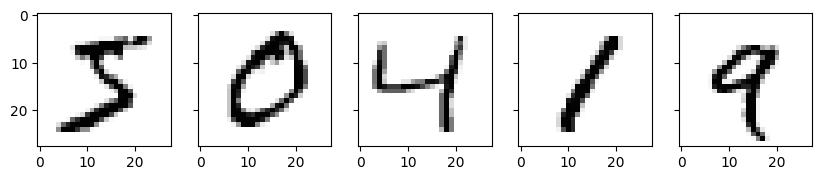

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
mnist = keras.datasets.mnist

# 격자형태의 공간에 데이터를 그려보자
def draw_images(n, data):
   fig, ax = plt.subplots(1, n, sharex=True, sharey=True,\
                          figsize=(10,2))
   for i in range(n):
       ax[i].imshow(data[i], cmap='Greys')

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 다섯 장의 이미지를 그려보자
draw_images(5, X_train)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 데이터셋의 정보 요약
print('학습 데이터', X_train.shape, y_train.shape)
print('테스트 데이터', (X_test.shape, y_test.shape))
# 픽셀의 정보 요약
print(f'학습 데이터의 최소값 : {X_train.min()}, 학습 데이터의 최대값 : {X_train.max()}')
print(f'학습 데이터의 평균값 : {X_train.mean()}, 학습 데이터의 표준편차 : {X_train.std()}')

학습 데이터 (60000, 28, 28) (60000,)
테스트 데이터 ((10000, 28, 28), (10000,))
학습 데이터의 최소값 : 0, 학습 데이터의 최대값 : 255
학습 데이터의 평균값 : 33.318421449829934, 학습 데이터의 표준편차 : 78.56748998339798


In [ ]:
X_train = X_train / 255.
# 정규화 후 픽셀의 정보 요약
print(f'학습 데이터의 최소값 : {X_train.min()}, 학습 데이터의 최대값 : {X_train.max()}')
print(f'학습 데이터의 평균값 : {X_train.mean()}, 학습 데이터의 표준편차 : {X_train.std()}')

학습 데이터의 최소값 : 0.0, 학습 데이터의 최대값 : 1.0
학습 데이터의 평균값 : 0.1306604762738429, 학습 데이터의 표준편차 : 0.3081078038564622


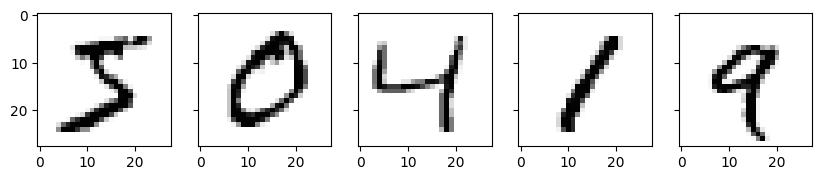

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

# MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
mnist = keras.datasets.mnist

def show_data(data):
   # 배치크기를 설정하고 배치 이미지를 가져옴
   for X_batch, y_batch in data.flow(X_train, y_train, batch_size=16,\
                                        shuffle=False):
       draw_images(5, X_batch)
       break

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# 데이터를 정규화 함
X_train = X_train / 255.0
X_test = X_test / 255.0
# 이미지 데이터 제너레이터를 이용하여 증강기능을 호출
imagegen = ImageDataGenerator(featurewise_center=True,\
                             featurewise_std_normalization=True)
# 주어진 파라미터로 데이터를 증강시킴
imagegen.fit(X_train)
show_data(imagegen)

In [ ]:
for X_batch, y_batch in imagegen.flow(X_train, y_train,\
                                      batch_size=9, shuffle=False):
    # 배치 데이터셋의 정보 요약
    print(f'배치 데이터 : {X_batch.shape}')
    # 픽셀의 정보 요약
    print(f'배치 데이터의 최소값 : {X_batch.min()}')
    print(f'배치 데이터의 최대값 : {X_batch.max()}')
    print(f'배치 데이터의 평균값 : {X_batch.mean()}')
    print(f'배치 데이터의 표준편차 : {X_batch.std()}')
    break

배치 데이터 : (9, 28, 28, 1)
배치 데이터의 최소값 : -0.4240730404853821
배치 데이터의 최대값 : 2.8215339183807373
배치 데이터의 평균값 : -0.04093816503882408
배치 데이터의 표준편차 : 0.9531126022338867


In [ ]:
# 다양한 키워드 인자를 이용해서 데이터를 변형하자
imagegen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,\
                              height_shift_range=0.2,\
                              shear_range=0.2,zoom_range=0.2,\
                              horizontal_flip=True,fill_mode='nearest')
imagegen.fit(X_train)
for X_batch, y_batch in imagegen.flow(X_train, y_train,\
                                      batch_size=9, shuffle=False):
    # 배치 데이터셋의 정보 요약
    print(f'배치 데이터 : {X_batch.shape}')
    # 픽셀의 정보 요약
    print(f'배치 데이터의 최소값 : {X_batch.min()}')
    print(f'배치 데이터의 최대값 : {X_batch.max()}')
    print(f'배치 데이터의 평균값 : {X_batch.mean()}')
    print(f'배치 데이터의 표준편차 : {X_batch.std()}')
    break

배치 데이터 : (9, 28, 28, 1)
배치 데이터의 최소값 : 0.0
배치 데이터의 최대값 : 0.9979382157325745
배치 데이터의 평균값 : 0.11548341810703278
배치 데이터의 표준편차 : 0.2729971408843994


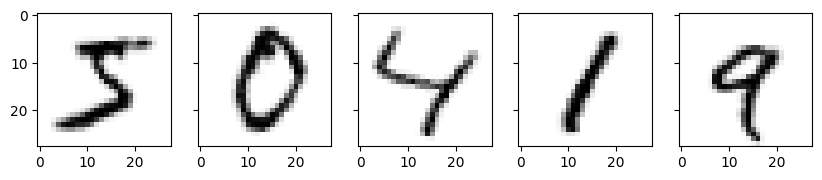

In [ ]:
# 0도에서 30도 범위에서 랜덤하게 회전
imagegen = ImageDataGenerator(rotation_range=30)
show_data(imagegen)

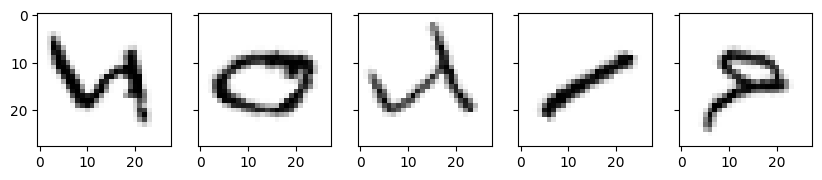

In [ ]:
# 0도에서 90도 범위에서 랜덤하게 회전
imagegen = ImageDataGenerator(rotation_range=90)
show_data(imagegen)

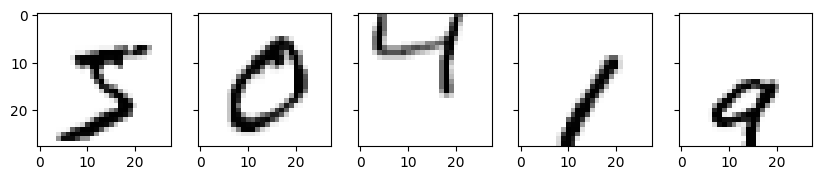

In [ ]:
# 원래 이미지를 0-30% 범위에서 랜덤하게 수직이동
imagegen = ImageDataGenerator(width_shift_range=.3)
imagegen.fit(X_train)
show_data(imagegen)

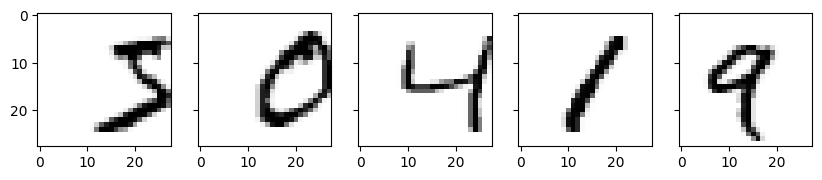

In [ ]:
imagegen = ImageDataGenerator(height_shift_range=.3)
imagegen.fit(X_train)
show_data(imagegen)

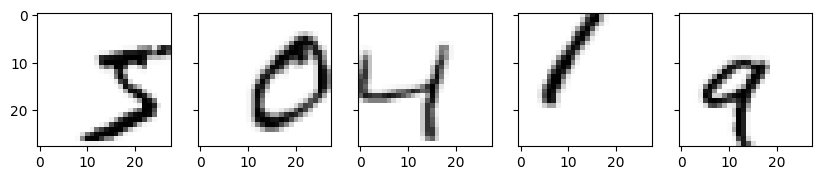

In [ ]:
shift = 0.2
imagegen = ImageDataGenerator(width_shift_range=shift,\
                              height_shift_range=shift)
imagegen.fit(X_train)
show_data(imagegen)

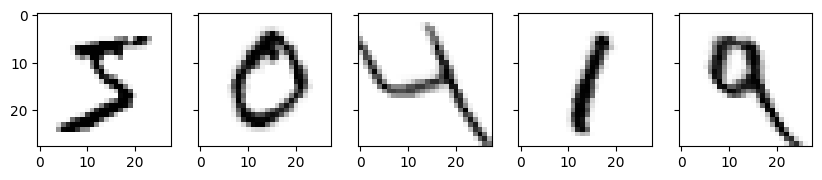

In [ ]:
shear = 40
imagegen = ImageDataGenerator(shear_range=shear)
show_data(imagegen)

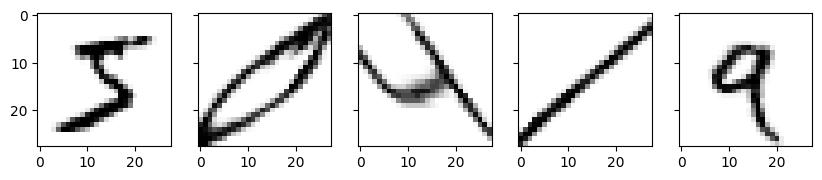

In [ ]:
shear = 60
imagegen = ImageDataGenerator(shear_range=shear)
show_data(imagegen)

---
#### 뒤집기 변환과 줌 변환

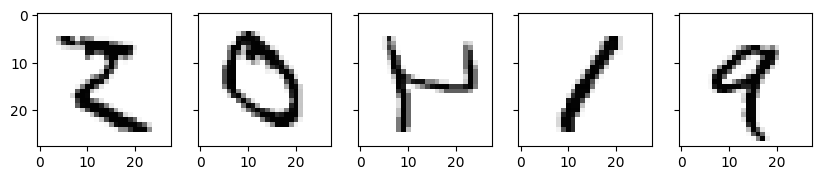

In [ ]:
imagegen = ImageDataGenerator(horizontal_flip=True)
show_data(imagegen)

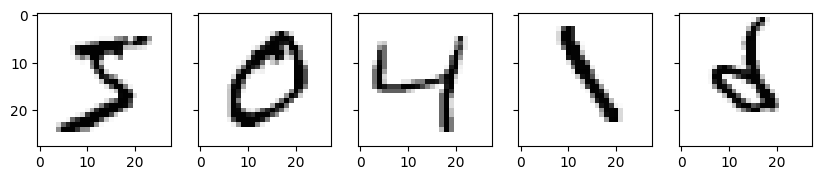

In [ ]:
imagegen = ImageDataGenerator(vertical_flip=True)
show_data(imagegen)

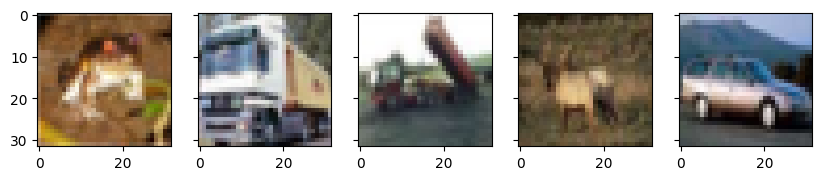

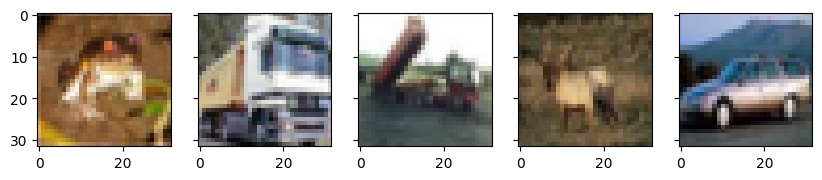

In [ ]:
from keras.datasets import cifar10
from matplotlib import pyplot

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# 원본 이미지
cifar_datagen = ImageDataGenerator()
show_data(cifar_datagen)
# 뒤집기 변환을 적용시키자
cifar_datagen = ImageDataGenerator(horizontal_flip=True)
show_data(cifar_datagen)

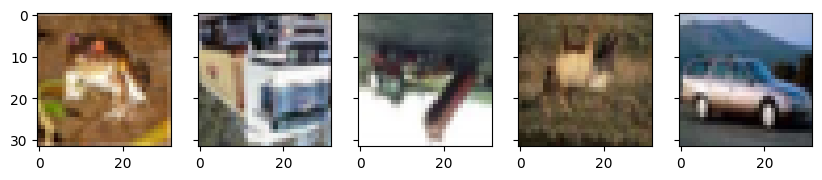

In [ ]:
# 수직 방향, 수평 방향 뒤집기 변환을 적용시키자
cifar_datagen = ImageDataGenerator(horizontal_flip=True,\
                                   vertical_flip=True)
show_data(cifar_datagen)

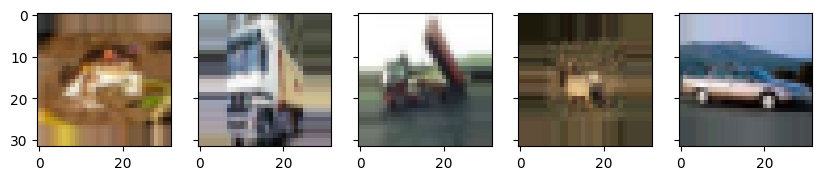

In [ ]:
cifar_datagen = ImageDataGenerator(zoom_range=[1.0, 1.7])
show_data(cifar_datagen)

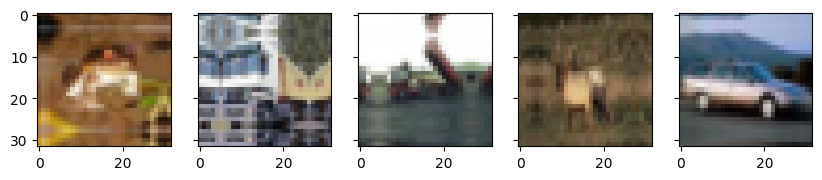

In [ ]:
# 경계 외부의 픽셀은 내부 픽셀과 반사되도록 함
cifar_datagen = ImageDataGenerator(zoom_range=[1.0, 1.7],\
                                   fill_mode='reflect')
show_data(cifar_datagen)

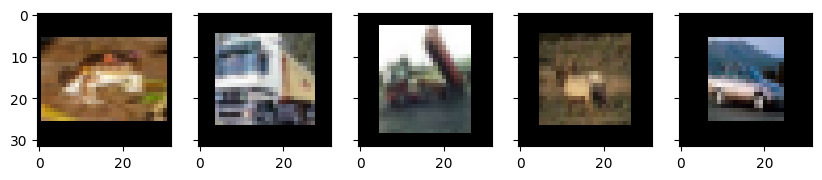

In [ ]:
# 경계 외부의 픽셀 색상을 고정시킴
cifar_datagen = ImageDataGenerator(zoom_range=[1.0, 1.7],\
                                   fill_mode='constant')
show_data(cifar_datagen)

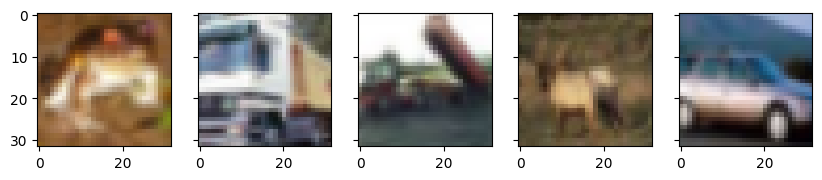

In [ ]:
# 확대 축소 범위를 0.7에서 1.0으로 지정(이미지 확대 효과)
cifar_datagen = ImageDataGenerator(zoom_range=[.7, 1.])
show_data(cifar_datagen)

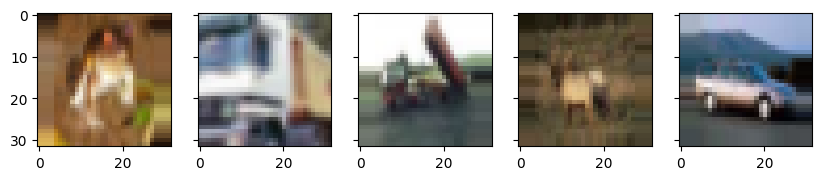

In [ ]:
# 확대 축소 범위를 1-0.3에서 1+0.3으로 지정
cifar_datagen = ImageDataGenerator(zoom_range=.3)
show_data(cifar_datagen)

#### 증강 데이터 저장하기

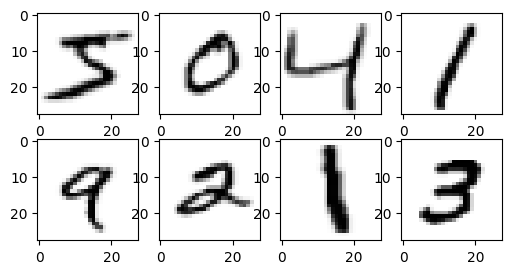

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train / 255.0
X_test = X_test / 255.0

row, col = 2, 4
# 데이터 저장하기
datagen = ImageDataGenerator(zoom_range=[.8, 1.2], rotation_range=.3)
# 배치 크기 설정, 첫 배치 이미지를 화면에 그리기
# aug_라는 접두어를 가진 png 이미지를 생성
for X_batch, y_batch in datagen.flow(X_train, y_train,\
                                batch_size=row*col,\
                                shuffle=False, save_to_dir='.',\
                                save_prefix='aug_', save_format='png'):
    # 그리드 구조에 데이터 그리기
    fig, ax = plt.subplots(row, col, figsize=(6,3))
    for i in range(row):
       for j in range(col):
          ax[i][j].imshow(X_batch[i*col+j].reshape(28,28),cmap='Greys')
    break

In [ ]:
!ls -l

total 36
-rw-r--r-- 1 root root  418 Feb 15 05:29 aug__0_7963.png
-rw-r--r-- 1 root root  342 Feb 15 05:29 aug__1_2509.png
-rw-r--r-- 1 root root  396 Feb 15 05:29 aug__2_5282.png
-rw-r--r-- 1 root root  300 Feb 15 05:29 aug__3_2411.png
-rw-r--r-- 1 root root  318 Feb 15 05:29 aug__4_8309.png
-rw-r--r-- 1 root root  350 Feb 15 05:29 aug__5_7278.png
-rw-r--r-- 1 root root  312 Feb 15 05:29 aug__6_3584.png
-rw-r--r-- 1 root root  351 Feb 15 05:29 aug__7_8740.png
drwxr-xr-x 1 root root 4096 Feb 13 14:23 sample_data
